In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box

# Boundary files 

https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-eng.cfm

Apparently the boundaries are different for different year

In [2]:
lda_filelocation = '/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/Shapes/lda_000b21a_e/lda_000b21a_e.shp'
lct_filelocation = '/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/Shapes/lct_000b21a_e/lct_000b21a_e.shp'

lda_filelocation_od = '/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/Shapes/lda_000b16a_e/lda_000b16a_e.shp'
lct_filelocation_od = '/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/Shapes/lct_000b16a_e/lct_000b16a_e.shp'

da_census_file_location = "/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/2022/98-401-X2021006_Quebec_eng_CSV/98-401-X2021006_English_CSV_data_Quebec.csv"
ct_census_file_location = "/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/2022/98-401-X2021007_eng_CSV/98-401-X2021007_English_CSV_data.csv"

saaq_file_location = "/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/saaq/SAAQ_AD_donnees_all_2016.xlsx"

shape_file_write_location = "outShape.shp"

od_data_folder = "/Users/ashrafzaman/matsim_pipelines/DataDonwloaded/EOD_from_Louiselle/EOD"

In [34]:
da = gpd.read_file(lda_filelocation)
ca = gpd.read_file(lct_filelocation)

The boundary shapefiles are avaialable at 
https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/index2021-eng.cfm?year=21

Download the 2021 dessimination area (lda) and census (lct) tract 

In [35]:
da.to_crs(epsg = 32188, inplace = True)
ca.to_crs(epsg = 32188, inplace = True)
minx=225784
miny=4996037
maxx=340247
maxy=5110581
da_clipped = da.cx[minx:maxx,miny:maxy]
ca_clipped = ca.cx[minx:maxx,miny:maxy]

In [36]:
inter = gpd.overlay(da_clipped, ca_clipped, how='union')
# inter.plot()
inter.rename(columns={'DGUID_1':'DGUID_DA','PRUID_1':'PRUID','LANDAREA_1':'LANDAREA_DA','LANDAREA_2':'LANDAREA_CT','DGUID_2':'DGUID_CT'},inplace=True)
inter.drop('PRUID_2',axis=1)
inter.sort_values(by=['DAUID'])
inter['geo'] = list(range(len(inter)))#this is the new da id or in popgen term geo, i.e., the smaller area
inter['region']=inter.groupby(['CTUID']).ngroup()#this is the new ct id or in popgen term region, i.e., the larger area
inter.keys()
inter_new= inter[['DAUID','CTUID','PRUID', 'geo', 'region','DGUID_DA', 'DGUID_CT',
       'CTNAME', 'LANDAREA_DA','LANDAREA_CT', 'geometry']]
inter_new.to_file('output/geoFilter.shp')
# inter_new[['region','geo']].to_csv('output/region_geo.csv',index = False)


/Users/ashrafzaman/opt/anaconda3/envs/newMatsimPipeline/lib/python3.9/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/var/folders/v6/djhtsx5d3198mkwrr88jb6tc0000gn/T/ipykernel_50550/4197215506.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 11920 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  inter = gpd.overlay(da_clipped, ca_clipped, how='union')
/Users/ashrafzaman/opt/anaconda3/envs/newMatsimPipeline/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/v6/djhtsx5d3198mkwrr88jb6tc0000gn/T/ipykernel_50550/4197215506.py:11: UserWarning: Column names longer than 10 characters will be trun

In [37]:
inter.keys()
inter_new= inter[['DAUID','CTUID','PRUID', 'geo', 'region','DGUID_DA', 'DGUID_CT',
       'CTNAME', 'LANDAREA_DA','LANDAREA_CT', 'geometry']]
inter_new.to_file('output/geoFilter.shp')
# inter_new[['region','geo']].to_csv('output/region_geo.csv',index = False)

/Users/ashrafzaman/opt/anaconda3/envs/newMatsimPipeline/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/v6/djhtsx5d3198mkwrr88jb6tc0000gn/T/ipykernel_50550/4241198186.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  inter_new.to_file('output/geoFilter.shp')


<AxesSubplot: >

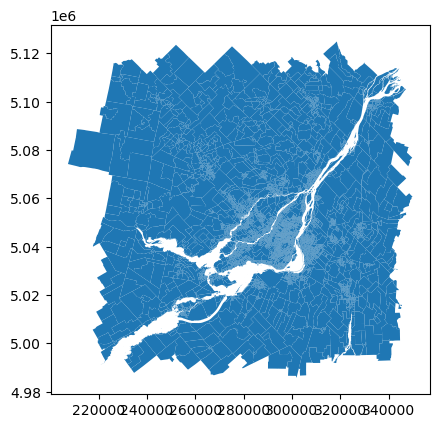

In [40]:
inter_new.plot()

<AxesSubplot: >

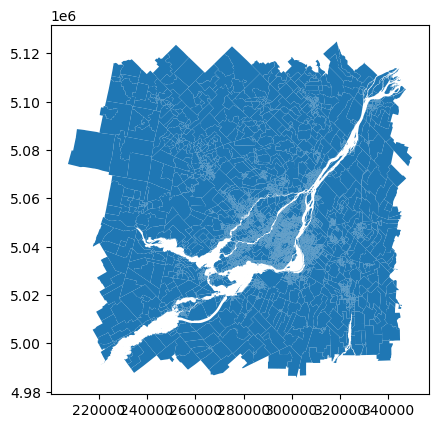

In [42]:
da_clipped.plot()

<AxesSubplot: >

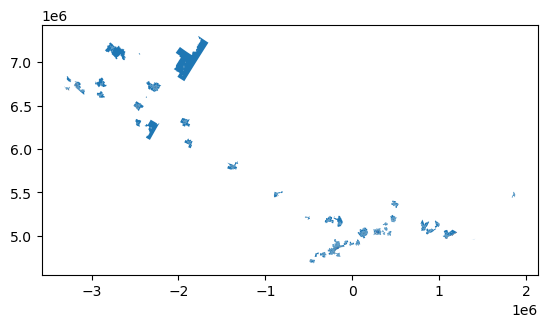

In [45]:
ca.plot()

Read the census data

In [39]:
inter_new.DAUID = inter_new.DAUID.astype(int)
inter_new.CTUID = inter_new.CTUID.astype(float)
del da,ca,inter,da_clipped,ca_clipped,minx,miny,maxx,maxy


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

## CENSUS DATA

## Source: https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/details/download-telecharger.cfm?Lang=E&SearchText=Quebec&DGUIDlist=2021A000224&GENDERlist=1,2,3&STATISTIClist=1&HEADERlist=0 

Date: 10/01/2023 (DD.MM.YYYY)

Download the following files for DA and CT files and extract to generate the input data for this class 

Canada, provinces, territories, census divisions (CDs), census subdivisions (CSDs) and dissemination areas (DAs) - Quebec only

and 

Census metropolitan areas (CMAs), tracted census agglomerations (CAs) and census tracts (CTs)

cite: 
Statistics Canada. 2022. (table). Census Profile. 2021 Census of Population. Ottawa. Released December 15, 2022.
https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/details/download-telecharger.cfm?Lang=E&SearchText=Quebec&DGUIDlist=2021A000224&GENDERlist=1,2,3&STATISTIClist=1&HEADERlist=0 (accessed January 10, 2023).


## Households(HH)
+ HH size
+ HH type (not available in the OD of Montreal)
+ HH income
+ HH number of cars (not available in census data). SAAQ provides data on car fleet with no association to persons or HH

### Household size
- 1 person (standard column name in the census data 52)
- 2 persons (53)
- 3 persons (54)
- 4 persons (55)
- 5 persons and more (56)
- Total household (50) // maybe should add for correction of data

### Household type (Sample data do not include clear information on households types, we shall use a simple HH type based on the presence of children in the HH. The presence of kids has an impact on travel behaviour of some members of the HH)
- Presence of children: yes 81 84 and 86
- Presence of children: no 82 and 85

### Household income

Different income sources are included in the census: Employment income, before/after tax income, etc. I use the HH total income (lines 261 to 280). To match this income with the sample income variable, one should check the definition of the  sample income.
 
Household income ($)
- \< 30,000
- 30,000 - 59,999
- 60,000 - 89,999
- 90,000 - 149,999
- \> 150,000

Census data must be grouped to match the income brackets above

+ 261	  Under $5,000
+ 262	  $5,000 to $9,999
+ 263	  $10,000 to $14,999
+ 264	  $15,000 to $19,999
+ 265	  $20,000 to $24,999
+ 266	  $25,000 to $29,999
+ 267	  $30,000 to $34,999
+ 268	  $35,000 to $39,999
+ 269	  $40,000 to $44,999
+ 270	  $45,000 to $49,999
+ 271	  $50,000 to $59,999
+ 272	  $60,000 to $69,999
+ 273	  $70,000 to $79,999
+ 274	  $80,000 to $89,999
+ 275	  $90,000 to $99,999
+ 276	  $100,000 and over
+ 277	  $100,000 to $124,999
+ 278	  $125,000 to $149,999
+ 279	  $150,000 to $199,999
+ 280	  $200,000 and over

# Persons
+ total population may be required to normalize and correct the data
+ Age: see categories below
+ Sex: female and male
+ Occupation: working full time, working parttime, not working, or not applicable
+ Driving licence: yes,no, not applicable
+ Place of work: from home, ouside home, not applicable

### Age (columns from 10 to 29)
+ 10 : 0 to 4 ans
+ 11 : 5 to 9 ans
+ 12 : 10 to 14 ans
+ 14 : 15 to 19 ans
+ 15 : 20 to 24 ans
+ 16 : 25 to 29 ans
+ 17 : 30 to 34 ans
+ 18 : 35 to 39 ans
+ 19 : 40 to 44 ans
+ 20 : 45 to 49 ans
+ 21 : 50 to 54 ans
+ 22 : 55 to 59 ans
+ 23 : 60 to 64 ans
+ 25 : 65 to 69 ans
+ 26 : 70 to 74 ans
+ 27-29 : 75 ans et +

### Sex (1)
+ 1 : Male
+ 1 : Female

### Occupation
+ 1: Not working (retired persons and unemployed, students with part-time jobs and over 15 y/o, deny answer, home) (2232)
+ 2: Full-time job (2234)
+ 3: Part-time job (2235)
+ 4: Not applicable (people under the age of 15) (infered from age categories)(9)

mapping Occupation variable with HTS data:

1. Travailleur à temps complet -> category 2
2. Travailleur à temps partiel -> 3
3. Étudiant / élève: 
    + if age < 15 -> 4
    + if age $\geq$ 15 -> 1
4. Retraité -> 1
5. Autre -> 1
6. N/A : enfant de 4 ans et moins -> 4
7. À la maison -> 1
8. Refus -> 1

### Driving licence (SAAQ data)
+ 1 : Yes
+ 2 : No
+ 5 : Not applicable (age < 16)

### Place of work (25% sample? should I then make it 100%?)
+ From home (2594)
+ Outside home (2596, 2597)
+ Not applicable (the rest: under the age of 15)2595

### total population 
+ total 1

In [9]:
saaq_data= pd.read_excel(saaq_file_location, sheet_name="2016_csv")

saaq_data = saaq_data[saaq_data.adidu.isin(inter_new.DAUID)]
saaq_data.drop(columns=['auto_elec','auto_conv', 'camleg_elec', 'camleg_conv', 'nonprec_elec','nonprec_conv', 'auto_tot', 'camleg_tot', 'nonprec_tot', 'elec_tot','conv_tot',
                        'commentaires'], inplace=True)

saaq_data.rename(columns={"permis_h":"license_sex_1", "permis_f": "license_sex_2", "permis_tot": "license", "nbadr_1permis": "hh_driving_license_1", "nbadr_2permis": "hh_driving_license_2",
                          "nbadr_3permis": "hh_driving_license_3", "nbadr_4pluspermis": "hh_driving_license_4", "tot_veh": "total_car", "nbadr_1pau": "hh_car_1", "nbadr_2pau": "hh_car_2",
                          "nbadr_3pau": "hh_car_3", "nbadr_4pluspau": "hh_car_4"}, inplace=True)
#saaq_data.fillna(np.random.randint(1,6), inplace=True)
saaq_data = saaq_data.merge(inter_new, left_on="adidu", right_on="DAUID")

In [10]:
iter_csv = pd.read_csv(da_census_file_location, iterator=True, chunksize=2631,encoding='latin-1')
df_hh_da = pd.DataFrame(columns=['DIUID','geo','hh_size1','hh_size2','hh_size3','hh_size4','hh_size5','hh_type1','hh_type2','hh_income1','hh_income2','hh_income3','hh_income4','hh_income5','total_hh'])
df_per_da = pd.DataFrame(columns = ['DIUID','geo','age1','age2','age3','age4','age5','age6','age7','age8','age9','age10','age11',
'age12','age13','age14','age15','age16','sex_male','sex_female','occupation_full_time','occupation_part_time','occupation_unemployed','occupation_not_applicable','workplace_from_home','workplace_outside','workplace_not_applicable','total_person'])
for chunk_or in iter_csv:
    chunk = chunk_or.copy()
    chunk = chunk[chunk.ALT_GEO_CODE.astype(int).isin(inter_new.DAUID)]
    if len(chunk)!=0:
        a = []
        b = []
        chunk = chunk.set_index('CHARACTERISTIC_ID',inplace=False)
        DIUID = chunk['ALT_GEO_CODE'][1]
        a.append(DIUID)#add duid
        b.append(DIUID)
        geo_id = inter_new[inter_new.DAUID==DIUID].reset_index().loc[0]['geo']
        a.append(geo_id)#add geoId
        b.append(geo_id)

        #indexes start from 0 but the columns start from 1 so every index has to be subtracted 1

        a.extend(list(chunk.iloc[51-1:55-1+1]['C1_COUNT_TOTAL']))#add household size 1-5 51-55
        a.append(chunk.iloc[82-1]['C1_COUNT_TOTAL']+chunk.iloc[85-1]['C1_COUNT_TOTAL'])#add hh without kids 82 and 85
        a.append(chunk.iloc[81-1]['C1_COUNT_TOTAL']+chunk.iloc[84-1]['C1_COUNT_TOTAL']+chunk.iloc[86-1]['C1_COUNT_TOTAL'])#add hh with kids 81, 84, 86
        
        a.append(sum(chunk[261-1:266-1+1]['C1_COUNT_TOTAL']))#hh income less than 30000 row 261-266
        a.append(sum(chunk.iloc[267-1:271-1+1]['C1_COUNT_TOTAL']))#hh income 30000-60000 row 267-271
        a.append(sum(chunk.iloc[272-1:274-1+1]['C1_COUNT_TOTAL']))#hh income 60000-90000 row 272-274
        a.append(sum(chunk.iloc[275-1:278-1+1]['C1_COUNT_TOTAL'])-chunk.iloc[276-1]['C1_COUNT_TOTAL'])#hh income 90000-150000 row 275-278 but row 276 must be deducted
        a.append(sum(chunk.iloc[279-1:280-1+1]['C1_COUNT_TOTAL']))#hh income 90000-150000 row 279-280
        a.append(chunk.iloc[100-1]['C1_COUNT_TOTAL'])#Keeping the total count of hh as well
        #print(a)
        df_hh_da.loc[len(df_hh_da)] = a
        #print(df_hh_da)
        #age for population

        b.extend(list(chunk.iloc[10-1:12-1+1]['C1_COUNT_TOTAL']))#age 5-14
        b.extend(list(chunk.iloc[14-1:23-1+1]['C1_COUNT_TOTAL']))#age15-64
        b.extend(list(chunk.iloc[25-1:26-1+1]['C1_COUNT_TOTAL']))#age65-74
        b.append(sum(chunk.iloc[27-1:29-1+1]['C1_COUNT_TOTAL']))#age 75 and above
        #sex for population
        b.append(chunk.iloc[8-1]['C2_COUNT_MEN+'])#number of men taken from total age group
        b.append(chunk.iloc[8-1]['C3_COUNT_WOMEN+'])#number of women taken from total age group
        #occupation for population
        b.append(chunk.iloc[2234-1]['C1_COUNT_TOTAL'])#Full time work
        b.append(chunk.iloc[2235-1]['C1_COUNT_TOTAL'])#part time work

        b.append(chunk.iloc[2232-1]['C1_COUNT_TOTAL'])#did not work
        b.append(chunk.iloc[2238-1]['C1_COUNT_TOTAL']+chunk.iloc[9-1]['C1_COUNT_TOTAL'])#not applicable

        #workplace for population
        b.append(chunk.iloc[2594-1]['C1_COUNT_TOTAL'])#from home
        b.append(chunk.iloc[2596-1]['C1_COUNT_TOTAL']+chunk.iloc[2597]['C1_COUNT_TOTAL'])#outside home
        b.append(chunk.iloc[9-1]['C1_COUNT_TOTAL'])#not applicable
        
        b.append(sum(b[2:17 + 1]))#kept the total population for normalization (summing all age group)
        df_per_da.loc[len(df_per_da)] = b

In [11]:
df_hh_da = df_hh_da.merge(saaq_data[['geo','hh_driving_license_1','hh_driving_license_2','hh_driving_license_3','hh_driving_license_4','hh_car_1','hh_car_2','hh_car_3','hh_car_4']],on='geo',how='outer')

In [12]:
df_per_da = df_per_da.merge(saaq_data[['geo','total_car','license']],on='geo',how='outer')
df_per_da['license_no']=df_per_da['total_person']-df_per_da['license']
df_per_da['car_no']=df_per_da['total_person']-df_per_da['total_car']

In [13]:
iter_csv = pd.read_csv(ct_census_file_location, iterator=True, chunksize=2631,encoding='latin-1')
df_hh_ct = pd.DataFrame(columns=['CTUID','region','hh_size1','hh_size2','hh_size3','hh_size4','hh_size5','hh_type1','hh_type2','hh_income1','hh_income2','hh_income3','hh_income4','hh_income5','total_hh'])
df_per_ct = pd.DataFrame(columns = ['CTUID','region','age1','age2','age3','age4','age5','age6','age7','age8','age9','age10','age11',
'age12','age13','age14','age15','age16','sex_male','sex_female','occupation_full_time','occupation_part_time','occupation_unemployed','occupation_not_applicable','workplace_from_home','workplace_outside','workplace_not_applicable','total_person'])

for chunk_or in iter_csv:
    chunk = chunk_or.copy()
    if len(chunk[chunk.ALT_GEO_CODE.astype(float).isin(inter_new.CTUID.astype(float))])!=0:
        a=[]
        b=[]
        chunk = chunk.set_index('CHARACTERISTIC_ID',inplace=False)
        CTUID = chunk['ALT_GEO_CODE'][1].astype(float)
        a.append(CTUID)#add duid
        b.append(CTUID)
        region_id = inter_new[inter_new.CTUID.astype(float).isin(chunk.ALT_GEO_CODE.astype(float))].reset_index().loc[0]['region']
        a.append(region_id)#add geoId
        b.append(region_id)
        
        
        a.extend(list(chunk.iloc[51-1:55-1+1]['C1_COUNT_TOTAL']))#add household size 1-5 51-55
        a.append(chunk.iloc[82-1]['C1_COUNT_TOTAL']+chunk.iloc[85-1]['C1_COUNT_TOTAL'])#add hh without kids 82 and 85
        a.append(chunk.iloc[81-1]['C1_COUNT_TOTAL']+chunk.iloc[84-1]['C1_COUNT_TOTAL']+chunk.iloc[86-1]['C1_COUNT_TOTAL'])#add hh with kids 81, 84, 86
        
        a.append(sum(chunk[261-1:266-1+1]['C1_COUNT_TOTAL']))#hh income less than 30000 row 261-266
        a.append(sum(chunk.iloc[267-1:271-1+1]['C1_COUNT_TOTAL']))#hh income 30000-60000 row 267-271
        a.append(sum(chunk.iloc[272-1:274-1+1]['C1_COUNT_TOTAL']))#hh income 60000-90000 row 272-274
        a.append(sum(chunk.iloc[275-1:278-1+1]['C1_COUNT_TOTAL'])-chunk.iloc[276-1]['C1_COUNT_TOTAL'])#hh income 90000-150000 row 275-278 but row 276 must be deducted
        a.append(sum(chunk.iloc[279-1:280-1+1]['C1_COUNT_TOTAL']))#hh income 90000-150000 row 279-280
        a.append(chunk.iloc[100-1]['C1_COUNT_TOTAL'])#Keeping the total count of hh as well
        #print(a)
        df_hh_ct.loc[len(df_hh_ct)] = a
        
        b.extend(list(chunk.iloc[10-1:12-1+1]['C1_COUNT_TOTAL']))#age 5-14
        b.extend(list(chunk.iloc[14-1:23-1+1]['C1_COUNT_TOTAL']))#age15-64
        b.extend(list(chunk.iloc[25-1:26-1+1]['C1_COUNT_TOTAL']))#age65-74
        b.append(sum(chunk.iloc[27-1:29-1+1]['C1_COUNT_TOTAL']))#age 75 and above
        #sex for population
        b.append(chunk.iloc[8-1]['C2_COUNT_MEN+'])#number of men taken from total age group
        b.append(chunk.iloc[8-1]['C3_COUNT_WOMEN+'])#number of women taken from total age group
        #occupation for population
        b.append(chunk.iloc[2234-1]['C1_COUNT_TOTAL'])#Full time work
        b.append(chunk.iloc[2235-1]['C1_COUNT_TOTAL'])#part time work

        b.append(chunk.iloc[2232-1]['C1_COUNT_TOTAL'])#did not work
        b.append(chunk.iloc[2238-1]['C1_COUNT_TOTAL']+chunk.iloc[9-1]['C1_COUNT_TOTAL'])#not applicable

        #workplace for population
        b.append(chunk.iloc[2594-1]['C1_COUNT_TOTAL'])#from home
        b.append(chunk.iloc[2596-1]['C1_COUNT_TOTAL']+chunk.iloc[2597]['C1_COUNT_TOTAL'])#outside home
        b.append(chunk.iloc[9-1]['C1_COUNT_TOTAL'])#not applicable
        
        b.append(sum(b[2:17 + 1]))#kept the total population for normalization (summing all age group)
        
        df_per_ct.loc[len(df_per_ct)] = b
        #print(df_hh_da)


In [14]:
df_hh_ct = df_hh_ct.merge(saaq_data[['region','hh_driving_license_1','hh_driving_license_2','hh_driving_license_3','hh_driving_license_4','hh_car_1','hh_car_2','hh_car_3','hh_car_4']].groupby('region').sum(),on='region',how='outer')

In [15]:
df_per_ct = df_per_ct.merge(saaq_data[['region','license','total_car']].groupby('region').sum(),on='region',how='outer')
df_per_ct['license_no']=df_per_ct['total_person']-df_per_ct['license']
df_per_ct['car_no']=df_per_ct['total_person']-df_per_ct['total_car']

<AxesSubplot: >

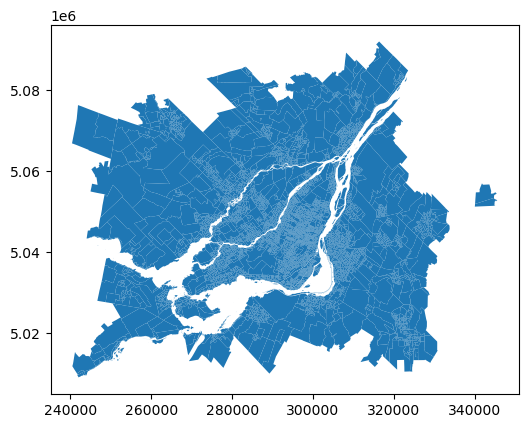

In [16]:
per_null_da = inter_new[inter_new['geo'].isin(df_per_da[df_per_da.isnull().any(axis = 1)]['geo'])]
per_null_da.plot()

<AxesSubplot: >

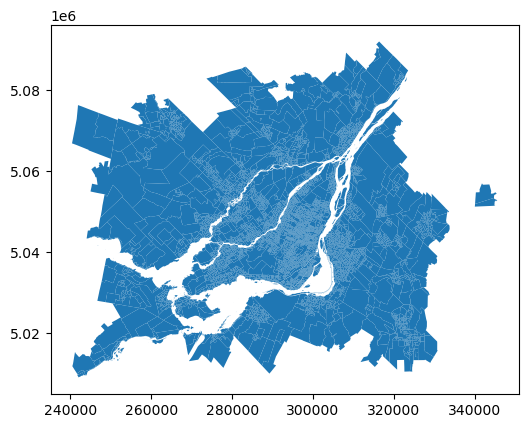

In [17]:
hh_null_da = inter_new[inter_new['geo'].isin(df_hh_da[df_hh_da.isnull().any(axis = 1)]['geo'])]
hh_null_da.plot()

<AxesSubplot: >

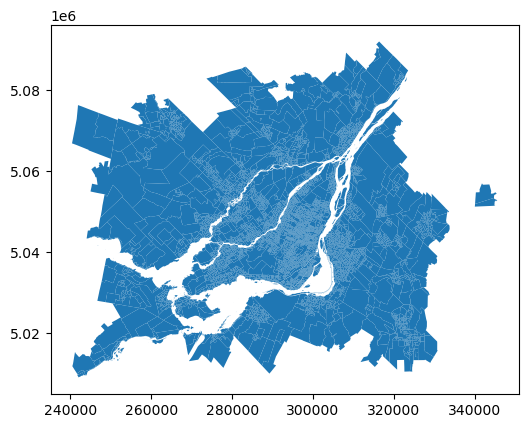

In [18]:
per_null_ct = inter_new[inter_new['region'].isin(df_per_ct[df_per_ct.isnull().any(axis = 1)]['region'])]
per_null_ct.plot()

<AxesSubplot: >

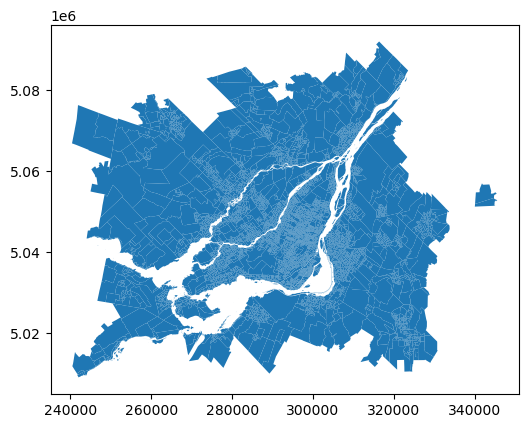

In [19]:
hh_null_ct = inter_new[inter_new['geo'].isin(df_hh_da[df_hh_da.isnull().any(axis = 1)]['geo'])]
hh_null_ct.plot()

In [20]:
hh_null_da[hh_null_da['region'].isin(hh_null_ct['region'])]

,DAUID,CTUID,PRUID,geo,region,DGUID_DA,DGUID_CT,CTNAME,LANDAREA_DA,LANDAREA_CT,geometry
0,24520101,4620690.00,24,0,683,2021S051224520101,2021S05074620690.00,0690.00,3.9586,65.4346,"MULTIPOLYGON (((322843.003 5082101.000, 322841..."
1,24520110,4620690.00,24,1,683,2021S051224520110,2021S05074620690.00,0690.00,0.7806,65.4346,"POLYGON ((320942.854 5082073.208, 321265.310 5..."
2,24520111,4620690.00,24,2,683,2021S051224520111,2021S05074620690.00,0690.00,0.1939,65.4346,"POLYGON ((320860.655 5081730.179, 320858.791 5..."
3,24520112,4620690.00,24,3,683,2021S051224520112,2021S05074620690.00,0690.00,1.9319,65.4346,"MULTIPOLYGON (((321705.000 5081499.998, 321710..."
4,24520113,4620690.00,24,4,683,2021S051224520113,2021S05074620690.00,0690.00,20.8775,65.4346,"POLYGON ((320067.058 5082942.259, 320061.699 5..."
...,...,...,...,...,...,...,...,...,...,...,...
6571,24750179,4620792.00,24,6571,796,2021S051224750179,2021S05074620792.00,0792.00,4.3616,31.0979,"POLYGON ((258345.446 5072997.135, 258348.486 5..."
6572,24750180,4620792.00,24,6572,796,2021S051224750180,2021S05074620792.00,0792.00,9.4638,31.0979,"POLYGON ((258583.427 5076373.877, 258587.381 5..."
6573,24750181,4620792.00,24,6573,796,2021S051224750181,2021S05074620792.00,0792.00,6.5496,31.0979,"POLYGON ((261572.725 5074517.787, 261572.731 5..."
6574,24760050,4620740.01,24,6574,752,2021S051224760050,2021S05074620740.01,0740.01,24.6956,90.0416,"POLYGON ((250667.044 5067564.902, 250665.481 5..."


<AxesSubplot: >

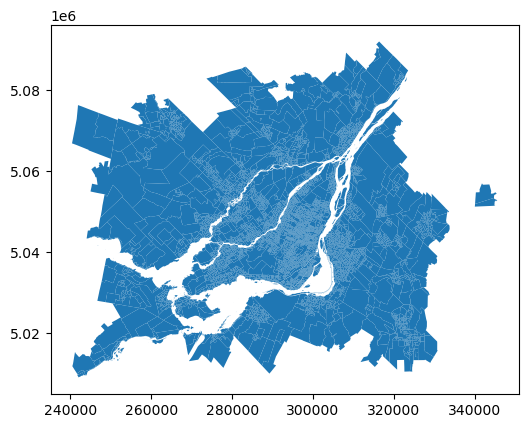

In [21]:
blank_data = hh_null_da[hh_null_da['region'].isin(hh_null_ct['region'])]
blank_data.plot()

<AxesSubplot: >

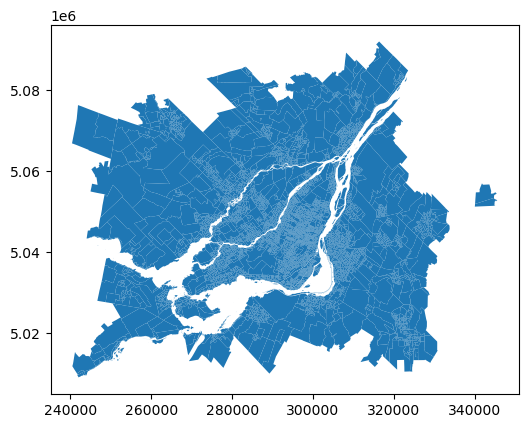

In [22]:
inter_new.plot()

## OD DATA READ

In [23]:
od_data = pd.read_csv(od_data_folder+"/mtl18pv2c.csv",delimiter=";")

/var/folders/v6/djhtsx5d3198mkwrr88jb6tc0000gn/T/ipykernel_50550/2128401345.py:1: DtypeWarning: Columns (52,110,111,112,114,173,174,177,192,197,202,204,205,206,207) have mixed types. Specify dtype option on import or set low_memory=False.
  od_data = pd.read_csv(od_data_folder+"/mtl18pv2c.csv",delimiter=";")


In [24]:
od_pp = od_data[['nolog','noper','tper','sexe','age','grpage','incap','percond','abon_ap','abon_vls','passetc','occper','tele_trav','lieuocc','xmtmocc','ymtmocc','rmrocc','arrocc','sdrocc','srocc','smocc','cpocc','l_id_local','mobil','facper','facper18']].dropna()
od_hh = od_data[['nolog','tlog','nbper','nbveh','revenu','langue','nmodif_ass','incaplogi','xmtmlog','ymtmlog','r6log','r8log','rmrlog','arrlog','sdrlog','srlog','sdomi65','smlog','cplog','agr_domi','jour','sem','facmen','facmen18']].dropna()
od_dep = od_data[['nolog','noper','nodep','no_rep','hredep','ghredep','motif','motif_grp','date_dpl','jour_dpl','mode1','mode2','mode3','mode4','mode5','mode6','mode7','mode8','seq_modes','pers_auto','auto_ap','velo_ls','station_p','xmtmori','ymtmori','xlonori','ylatori','xmtmdes','ymtmdes','xlondes','ylatdes','ipere','facper18']].dropna()

In [25]:
od_pp['id_personne'] = od_data.nolog.astype(str)+"_"+od_data.noper.astype(str)
od_dep['id_personne'] = od_data.nolog.astype(str)+"_"+od_data.noper.astype(str)
od_dep['id_deplacement'] = od_data.nolog.astype(str)+"_"+od_data.noper.astype(str)+"_"+od_data.nodep.astype(str)



In [26]:
od_dep['hredep_dec'] = ((od_dep.hredep).astype(int)/100).astype(int)+od_dep.hredep.astype(int)%100/60

### OD data from Louiselle MTQ

There are three different OD data provided Quebec 2017,1986,1991 and MTL 18
Naturally, we will use the MTL 18

Total records: 393,826
Households: 73,437
Person: 168,905
Trips: 357,850

# Interesting fields are:

+ ipere: unique sequential number
+ idus: homekey + person key + trip key
+ provennance: F/C/W (landline/mobile/mail)
+ date_int: date of interview
+ deb_interv: interview start time

# Household variables

+ nolog: household no
+ tlog: occurance of hh
+ nbper: number of person in hh
+ nbveh: number of vehicle in hh
+ revenu: income 1:10-> 30,000<>=60,000<>=90,000<>=120,000<>=150,000<>=180,000<>=210,000<>=200,000, refuse, don't know
+ incaplogi: have disability 1/2/3 -> yes/no/refuse or don't know
+ xmtmlog: x of hh (EPSG 2950)
+ ymtmlog: y of hh (EPSG 2950)
+ rmrlog: census metropolitan area code
+ srlog: census tract of hh
+ cplog: potal code of hh
+ travel day: 1:5->Monday:Friday
+ sem: survey week (what is this???) 2 digit
+ facmen: expansion factor from 2016 census
+ Facmen18: expansion factor from ISQ 2018

# Person variables

+ noper: person Id in household
+ tper: first person occurance 1, else 0
+ clepersonne: number of the person in the dewelling 
+ sexe: sex 1/2-> male/female
+ age: 1:99
+ grpage: group age 0:5:75 and 75+
+ incap: disable 1/2/3/4->yes/no/refuse or don't know/N.A.
+ percond: driving license 1/2/3/4/5-> yes/no/don't know/refusal/under 16
+ abon_ap: ridesharing subscription 1/2/3/4-> yes/no/don't know or refused/N.A.
+ abon_vls: bikesharing subscription 1/2/3/4-> yes/no/don't know or refused/N.A.
+ passetc: transit pass: 1:10->(monthly tram/monthly train/STM monthly MTL/RTL monthly Longueuil/STM monthly Laval/ EXO MRC monthly crown/child under 5/no monthly/don't know or refuse)
+ occper: occupation 1:8 -> full time / part time / student / retired / other / child / at home / refusal
+ tele_trav: remote working 1:4 yes/no/refuse or don't know/ n.a.
+ lieuocc: usual work/study location 1:4,9,10-> home/child under 4/ different work or study status/ location/ none/refusal or don't know
+ xmtmocc : usual place of work/study x (EPSG 2950)
+ ymtmocc : usual place of work/study y (EPSG 2950)
+ rmrocc: census metropolitan area (cma) of usual place of work/study
+ srocco: census tract of usual place of work or study 
+ l_id_local: unique identifier of usual place of work

# Trip related data

+ mobil: if have trip 1:5 -> yes/no/child under 4/ don't know/refusal
+ facper: person-related expansion factor 2016 census data
+ facper18: person-related expansion factor from ISQ 2018
+ facedep18: trip related expansion factor from ISQ 2018
+ cledeplacement: trip id 
+ nodep: person's trip number
+ hredep: departure time 0:2800
+ ghredep: departure time group: 1:7,0 -> midnight:6am:9am:12pm:3.30pm:6.30:12pm:total:missing value
+ motif: motiv 1:13,0 -> work/business/on the road/study/shopping/leisure/visit from friend or relative/ health / Drive someone back / Look for someone/ Return home/ Other/ Undetermined or refusal or don't know/  without movement
+ motof_grp: reason for moving 1:8 -> work/study/return home/ leisure/ shopping/ other/ without movement/ intermediate 
+ date_dpl: travel data
+ jour_dpl: travel_day
+ mode1: mode8 1:18 
    1. self-driving
    2. car-passenger
    3. STM bus 
    4. Metro (As many times as transfer)
    5. RTL (bus Longueuil)
    6. STL (vus Laval)
    7. exo/mrc bus
    8. Train (As many times as stations)
    9. School bus
    10. Other bus
    11. Taxi
    12. Motorcycle
    13. Bike
    14. On foot 
    15. Paratransit
    16. Plane, train or intercity bus
    17. Modal transfer
    18. Indeterminate
+ seq_modes: looks similar (Concatenated mode order?)
+ covoiturage: information on the driver of the car 15:20 -> neighbour/co-worker/parent/other/refusal 
+ pers_auto: number of person shared the auto ride with 1:18/19 plus/20: refuse
+ auto_ap: if auto shared 1/2/3/4-> yes/no/refusal or don't know/ n.a.
+ velo_ls: if bike self service bike mode  1/2/3/4-> yes/no/refusal or don't know/ n.a.
+ station_p: paid to park 1/2/3/4/5 -> yes/no free/no provided by employer/refusal or don't know/ n.a. (park and ride or residential)
+ pont1: pont2 bridge taken
+ lig1:lig5 which transit lines are taken
+ metro1:metro4 station_entry:exit:transfer1:transfer2
+ gare1:gare4 entry:exit:exit:exit
+ aut1:aut12 auto links taken
+ trace1:trace5 route of the transit lines taken
+ dist: distance 
+ xmtmori: x of origin (EPSG 2950)
+ ymtmori: y of origin (EPSG 2950)
+ xlonori: longitude of origin
+ ylatori: latitude of origin
+ srori: census tract origin
+ cpori: postal code of origin
+ o_id_local: origin unique identifier
+ inodo: origin is in survey territory 0 no: 1 yes: 9 n.a.
+ xyo: origin 0 no:1 yes
+ xmtmdes: x of destination (EPSG 2950)
+ ymtmdes: y of destination (EPSG 2950)
+ xlondes: longitude of destination 
+ ylatdes: latitude of destination
+ srdes: destination census tract
+ cpdes: destianation postal code
+ d_id_local: destination unique identifier 
+ inodd: if destination in the survey territory 0 no: 1 yes: 9 not applicable
+ xyd: destination 0 no:1 yes
+ Depl_Excl: valid trip identifier 0 invalid due to external origin and destination: 1 origin or destination is inside survey location: 2 origin and destination is in survey location
+ nbjct: number of mode 
+ typjct1: 
    0. no mode transfer
    1. private - public (bus)
    2. private - public (metro)
    3. private - public (train)
    4. public (bus) - private  
    5. public (metro) - private 
    6. public (train) - private 
    7. out of territory - territory
    8. Territory - out of territory

+ typjct1_98: 
    0. no mode transfer
    1. private (car, motorcycle, taxi, bicycle) - public (bus, metro, commuter train)
    2. public - private
    3. private - exogeneous (bus, plane, train etc.)
    4. exogeneous - private 
    5. public - exogeneous
    6. exogeneous - public 
    7. Other

+ stajct1 : transfer identifier (appendix 3)
+ xmtmjct1: transfer location x (EPSG 2950)
+ ymtmjct1: transfer location y (EPSG 2950)
+ xlonjct1: longitude of transfer 
+ ylatjct1: latitude of transfer 
+ srjct1: census tract 2016 of transfer
+ j_id_local1: Junction point unique identifier
+ inodj1: junction point inside survey territory 0 no: 1 yes
+ tc: use of transit mode: yes: X blank: no
+ actif: if walking or cycling used yes X: blank no
+ autre_mot: if used school bus or taxi X: yes, blank: no
+ motorise: X yes: blank: no
+ mode_exclu: mode priority (derived variable) 
    1. car or motorcycle alone
    2. PT
    3. School bus, taxi, paratransit, other bus
    4. Active only (walk, bicycle)
    5. car or motorbike + transit
    6. transit + other (active or taxi)
    7. car or motorbike + other (active or taxi)
    8. other and undetermined
    9. Combination of 3 modes

+ mode uses metro, stm, rtl, stl, auto, autop(passenger), autoc(driver), mauto(driver 1 or passenger 2), autrebus (other bus), busscol (schoolbus), taxi, train, a_pied (walk), moto(motorcycle), velo (bicycle), cit (exo bus), au_mode(other mode), tr_adap(paratransit), indet1(indeterminate mode)





In [27]:
# del hh_all,hh_veh,hh_with_kid,hh_gpd,hh_srlog,hh_rev,income, hh
hh_all = od_data[['nolog','nbper','percond']].copy()
hh_all['size'] = 0
hh_all['license'] = 0

hh_veh = od_data[['nolog','nbveh']].drop_duplicates()

hh_all.loc[hh_all['nbper']>0,'size'] = 1
hh_all.loc[hh_all['percond']==1,'license'] = 1
hh = hh_all.groupby('nolog').sum()

hh = hh.merge(hh_veh,on='nolog',how='left')
hh.drop(columns=['percond','nbper'])
hh_with_kid = od_data[['nolog','noper','age']].copy().drop_duplicates()
hh_with_kid['with_kid'] = 0
hh_with_kid.loc[hh_with_kid['age']<19,'with_kid'] = 1
hh_with_kid = hh_with_kid.drop(columns=['age','noper'])
hh_with_kid = hh_with_kid.groupby('nolog').sum()
hh_with_kid['type'] = 2
hh_with_kid.loc[hh_with_kid['with_kid']>0,'type'] = 1
hh_with_kid = hh_with_kid.drop(columns=['with_kid'])
hh = pd.merge(hh,hh_with_kid,on='nolog',how='left')
hh_rev = od_data[['nolog','revenu']].copy().drop_duplicates()

hh_srlog = od_data[['nolog','srlog','xmtmlog','ymtmlog']].copy().drop_duplicates()

hh = hh.merge(hh_rev,on='nolog',how='left')
hh = hh.merge(hh_srlog,on='nolog',how='left')
hh.rename(columns={'nolog':'hh_id','srlog':'CTUID','nbveh':'number_of_vehicle','xmtmlog':'x','ymtmlog':'y'},inplace=True)
hh=hh.drop(columns=['percond','nbper'])
hh.CTUID = hh.CTUID.astype(str)
inter_new.CTUID = inter_new.CTUID.astype(str)

#hh = hh.merge(inter_new[['region','CTUID']].drop_duplicates(),on='CTUID',how='left')


income = pd.DataFrame(data = {'revenu':[1,2,3,4,5,6,7,8,9,10],'income':[1,2,3,4,5,6,6,6,6,6]})
hh_gpd = gpd.GeoDataFrame(hh[['hh_id','x','y']],geometry=gpd.points_from_xy(hh.x,hh.y),crs=inter_new.crs)
hh_gpd = gpd.sjoin(hh_gpd,inter_new,how='left')
hh = hh.merge(hh_gpd[['hh_id','region']], on = 'hh_id')

hh = hh.merge(income,on='revenu',how='left')
hh.loc[hh['license']>=4,'license'] = 4
hh.loc[hh['size']>=5,'size'] = 5
hh.loc[hh['number_of_vehicle']>=4,'number_of_vehicle'] = 4
hh=hh.drop(columns=['revenu','CTUID'])
# hh = hh.dropna()

hh.rename(columns={'hh_id':'hid','number_of_vehicle':'hh_car','license':'hh_driving_license','region':'sample_geo','size':'hh_size','type':'hh_type','income':'hh_income'},inplace=True)
hh_xy = hh
hh = hh.drop(columns=['x','y'])
hh.set_index('hid')
#hh.sample_geo = hh.sample_geo.astype(int)
del hh_all,hh_veh,hh_with_kid,hh_gpd,hh_srlog,hh_rev,income

/Users/ashrafzaman/opt/anaconda3/envs/newMatsimPipeline/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [28]:
print(hh_xy.loc[hh_xy.x>0].x.min())
print(hh_xy.loc[hh_xy.x>0].x.max())
print(hh_xy.loc[hh_xy.x>0].y.min())
print(hh_xy.loc[hh_xy.x>0].y.max())


225784
340247
4996037
5110581


In [29]:
hh_all

NameError: name 'hh_all' is not defined

In [ ]:
hh_null = hh_xy.loc[hh_xy.sample_geo.isnull()]
hh_null =gpd.GeoDataFrame(hh_null,geometry=gpd.points_from_xy(hh_null.x,hh_null.y))
hh_null.plot()

In [ ]:
pp_all=od_data[['nolog','noper','srlog','sexe','age','percond']]
pp_all['noper'] = pp_all['nolog'].astype(str)+"_"+pp_all['noper'].astype(str)
pp_all = pp_all.drop_duplicates()
pp_all['age'] = pd.cut(pp_all['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,100], labels=[ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],right = False)
pp_all.loc[pp_all['percond']>1,'percond']=0
pp_all['srlog'] = pp_all['srlog'].astype(str)
pp_all = pp_all.rename(columns={'srlog':'CTUID','percond':'dummy_license','sexe':'sex','nolog':'hid','noper':'pid'})
pp_all = pp_all.merge(inter_new[['CTUID','region']].drop_duplicates(),on = 'CTUID',how = 'left')
pp_all['license_sex'] = pp_all['sex']
pp_all.loc[pp_all['dummy_license']==0,'license_sex']=3
pp_all = pp_all.drop(columns='CTUID')
pp_all = pp_all.rename(columns={'region':'sample_geo'})

In [ ]:
df_hh_da = df_hh_da.dropna()
df_hh_da = df_hh_da.drop(columns='DIUID')
df_hh_da = df_hh_da.drop(columns='total_hh')

In [ ]:

df_hh_da['geo'].astype(str)
headerda = pd.DataFrame(columns = df_hh_da.keys())
a = ['variable_names','hh_size','hh_size','hh_size','hh_size','hh_size','hh_type','hh_type','hh_income','hh_income','hh_income','hh_income','hh_income','hh_driving_license','hh_driving_license','hh_driving_license','hh_driving_license','hh_car','hh_car','hh_car','hh_car']
b = ['variable_categories',1,2,3,4,5,1,2,1,2,3,4,5,1,2,3,4,1,2,3,4]
c = ['geo',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ']

headerda.loc[len(headerda)] = a
headerda.loc[len(headerda)] = b
headerda.loc[len(headerda)] = c
df_hh_da_new = pd.concat([headerda,df_hh_da],ignore_index=True)

df_hh_da_new = df_hh_da_new[['geo','hh_size1','hh_size2','hh_size3','hh_size4','hh_size5','hh_income1','hh_income2','hh_income3','hh_income4','hh_income5','hh_type1','hh_type2','hh_driving_license_1','hh_driving_license_2','hh_driving_license_3','hh_driving_license_4','hh_car_1','hh_car_2','hh_car_3','hh_car_4']]

In [ ]:
df_hh_ct = df_hh_ct.dropna()
df_hh_ct = df_hh_ct.drop(columns='CTUID')
df_hh_ct = df_hh_ct.drop(columns='total_hh')

In [ ]:
df_hh_ct['region'].astype(str)
headerda = pd.DataFrame(columns = df_hh_ct.keys())
a = ['variable_names','hh_size','hh_size','hh_size','hh_size','hh_size','hh_type','hh_type','hh_income','hh_income','hh_income','hh_income','hh_income','hh_driving_license','hh_driving_license','hh_driving_license','hh_driving_license','hh_car','hh_car','hh_car','hh_car']
b = ['variable_categories',1,2,3,4,5,1,2,1,2,3,4,5,1,2,3,4,1,2,3,4]
c = ['region',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ']

headerda.loc[len(headerda)] = a
headerda.loc[len(headerda)] = b
headerda.loc[len(headerda)] = c
df_hh_ct_new = pd.concat([headerda,df_hh_ct],ignore_index=True)

df_hh_ct_new = df_hh_ct_new[['region','hh_size1','hh_size2','hh_size3','hh_size4','hh_size5','hh_income1','hh_income2','hh_income3','hh_income4','hh_income5','hh_type1','hh_type2','hh_driving_license_1','hh_driving_license_2','hh_driving_license_3','hh_driving_license_4','hh_car_1','hh_car_2','hh_car_3','hh_car_4']]

This code now creates the files required for the popgen 

In [ ]:
inter_new[['region','geo']].to_csv('output/region_geo.csv',index = False)
inter_new[['region','region']].to_csv('output/region_sample.csv',index = False)
inter_new[['geo','region']].to_csv('output/geo_sample.csv',index = False)
hh[['hid','sample_geo','hh_size','hh_type','hh_car','hh_driving_license','hh_income']].to_csv('output/household_sample.csv',index=False)
df_hh_da_new.to_csv('output/household_geo_marginal.csv',index = False, header=False)
df_hh_ct_new.to_csv('output/household_region_marginal.csv',index = False, header=False)

In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [ ]:
od_data.keys()

In [ ]:
od_data.head(100)